In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import time
from gridworld import ProbabilisticGridWorld

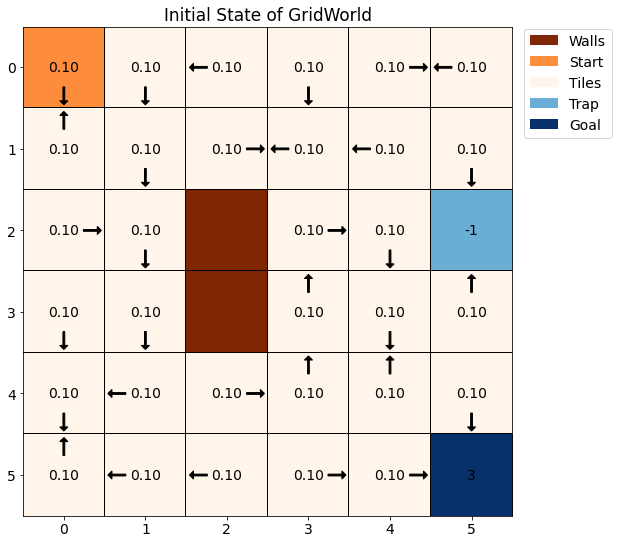

In [6]:
mdp = ProbabilisticGridWorld(6, 6, walls=[(2, 2), (2, 3)], traps=[
                            (5, 2)], trap_reward=-1,
                            goal_reward= 3,
                            cost_per_step= 0.05,
                            probality_wrong_step= 0.1)
mdp.visualize(savefig = False)

100%|██████████| 10000/10000 [00:01<00:00, 6495.40it/s]


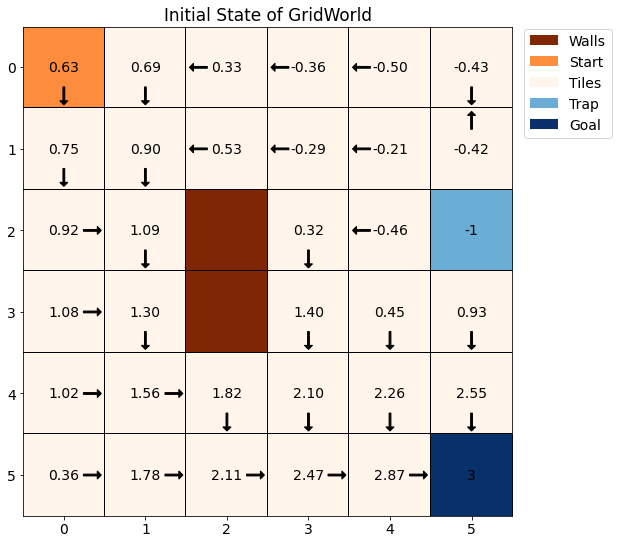

In [7]:
rewards = []
walltimes = []

start_time = time.time()

for i in tqdm.tqdm(range(10000)):
    
    rewards.append(mdp.step())
    walltimes.append( time.time() - start_time)
    
mdp.visualize(savefig=False)


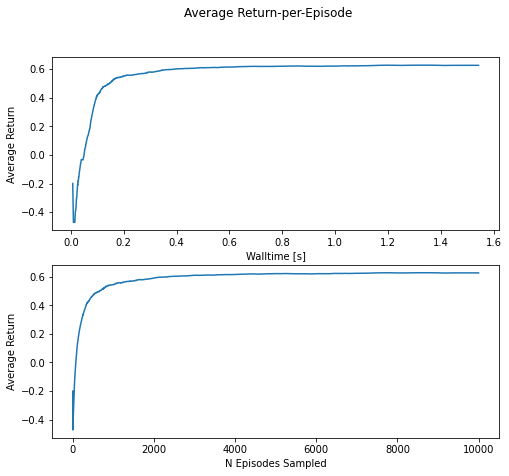

In [8]:
plt.figure(figsize=((8,7)))
plt.subplot(2 ,1,1)

plt.suptitle("Average Return-per-Episode")

plt.ylabel("Average Return")
plt.xlabel("Walltime [s]")
plt.plot(walltimes, rewards)

plt.subplot(2 ,1,2)
plt.ylabel("Average Return")
plt.plot( rewards)
plt.xlabel("N Episodes Sampled")
plt.show()

In [ ]:
def run(self, viz_at=[50, 200, 500, 1000, 10000], savefig=False):
    # agg for calculated values

    captured_values = {}

    for i in tqdm.tqdm(range(max(viz_at)), desc="Simulate"):
        self.episode()

        # save values
        if i + 1 in viz_at:
            captured_values[i + 1] = self.get_state_values().copy()

    for n, values in captured_values.items():
        self.visualize(f"After {n} Iterations", values, savefig=savefig)


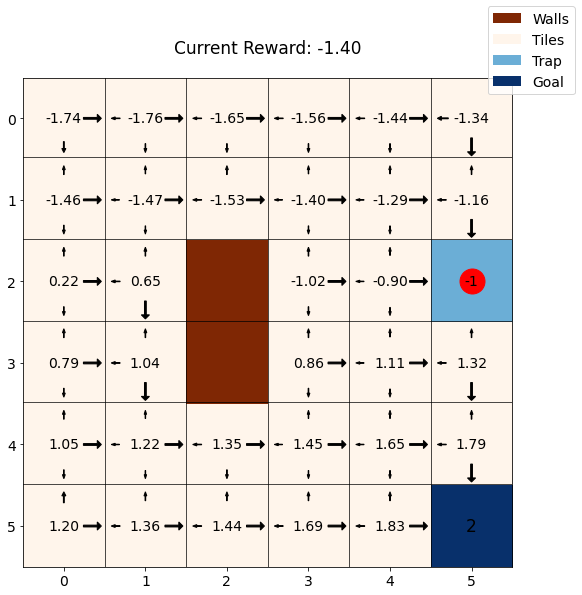

In [14]:
ani = mdp.animate_episode(start_point=(0,2), nbuffer= 60)
ani.save("ani.gif", savefig_kwargs={"facecolor" : (1,1,1,1)}, fps = 30)
ani.save("ani.mp4", fps=30)
